In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im, ImageFont, ImageDraw
import cv2 as cv
from pprint import pprint 
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [3]:
def findTextV1(img,txt):
    img = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    txt = cv.cvtColor(txt,cv.COLOR_RGB2GRAY)
    (l,c) = img.shape
    (lt,ct) = txt.shape
    zeros = np.zeros((lt,ct),dtype=int)
    
    for i in range(l-2):
        #print('line ', i)
        for j in range(c-2):            
            try:                
                res = txt - img[i:i+lt, j:j+ct]
                if((res==zeros).all()):                                
                    plt.figure("found")
                    plt.imshow(img[i:i+lt, j:j+ct],cmap="gray")
                    return True                
            except:
                continue
    return False          


In [4]:
def findText(img,listWords):
    
    taille = len(listWords)
    
    img = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    (l,c) = img.shape
    
    wordNb = 0
    txt = cv.cvtColor(listWords[wordNb],cv.COLOR_RGB2GRAY)    
    (lt,ct) = txt.shape
    zeros = np.zeros((lt,ct),dtype=int)            
    
    firstLineSelection = 0
    lastLineSelection = 0
    
    for i in range(l-2):
        for j in range(c-2):                            
                try:                
                    res = txt - img[i:i+lt, j:j+ct]
                    if((res==zeros).all()):
                        
                        if(wordNb==0):
                            # the section we are looking for starts here
                            firstLineSelection = i
                        
                        if(wordNb==taille-1):                            
                            # and ends here
                            lastLineSelection = i
                        
                        # this means we found the current word, move to next word
                        wordNb+=1
                        txt = cv.cvtColor(listWords[wordNb],cv.COLOR_RGB2GRAY)    
                        (lt,ct) = txt.shape
                        zeros = np.zeros((lt,ct),dtype=int)                                    
                except:
                    continue
    
    return (wordNb==taille-1,firstLineSelection,lastLineSelection)


In [5]:
# generate images from text, word by word using PILlow
def generateImages(text,basePath,fontsPath = "./Fonts",resultsPath="./tmp"):
    
    try:
        os.mkdir(resultsPath)
    except:
        pass
    
    words = text.split(" ")
    
    # get list of fonts files names
    fonts = []
    fontTmps = []
    
    #go to fonts dir    
    os.chdir(fontsPath)
    for elm in os.listdir():
        fonts.append(elm)
    
    # return to principal dir
    os.chdir("..")

    
    for f in fonts:
        fontTmp = resultsPath+"/"+f.split(".ttf")[0]+"Tmp"
        fontTmps.append(fontTmp)        
        os.mkdir(fontTmp)
        for w in words:
            # generate image of w with font f and store it in /tmp/fontTmp
            for s in range(8,40):                
                with im.open(basePath).convert("RGBA") as base:
                    txtt = im.new("RGBA", base.size, (255,255,255,255))   #base.size = ((len(w)*15)+(len(w)*5),50)
                    fnt = ImageFont.truetype("./Fonts/"+f,s)
                    d = ImageDraw.Draw(txtt)
                    d.text((0,30),w,font=fnt,fill=(0,0,0,255))
                    #out = im.alpha_composite(base,txtt)
                    #out.show()
                    txtt.save(fontTmp+"/"+str(s)+w+".png","PNG")
                    #plt.imshow(txtt)

    
    return fontTmps

In [6]:
def trimWhiteSpace(img):
    for j in range(img.shape[1]-2):
        if((img[:,j+1:] == np.ones(img[:,j+1:].shape)*255).all()):
            img = img[:,:j+1]
    for i in range(img.shape[0]-2):
        if((img[i+1:,:] == np.ones(img[i+1:,:].shape)*255).all()):
            img = img[:i+1,:]
    
    for i in range(img.shape[0]-1,1,-1):
        if((img[i::-1,:] == np.ones(img[i::-1,:].shape)*255).all()):
            img = img[i:,:]
    return img

In [7]:
def bruteForceSearch(docPath,text):
    
    fontTmps = generateImages(text,docPath)
    
    doc = cv.imread(docPath)
    
    
    
    for ft in tqdm(fontTmps):
        listWords = []
        os.chdir(ft)
        # here we have word by word images of the original text
        for wim in os.listdir():
            im = cv.imread(wim)
            im = trimWhiteSpace(im)
            listWords.append(im)
            os.remove(wim)
        
        os.chdir("../..")
        os.rmdir(ft)
        
        
        (res,fline,lline) = findTextV3(doc,listWords) # V3 au lieu de  findText 
        
        if(res):
            plt.imshow(doc[fline:lline,:],cmap="gray")
            return (True,ft)
    
    
    
    return (False,None)
        
            
    

In [14]:
bruteForceSearch("./imgs/im13.png","Image Segmentation")

  0%|          | 0/19 [01:44<?, ?it/s]


KeyboardInterrupt: 

In [8]:
def findTextV3(img,listWords):
    
    taille = len(listWords)
    
    img = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    (l,c) = img.shape
    
    wordNb = 0
    txt = cv.cvtColor(listWords[wordNb],cv.COLOR_RGB2GRAY)    
    (lt,ct) = txt.shape
    zeros = np.zeros((lt,ct),dtype=int)            
    
    firstLineSelection = 0
    lastLineSelection = 0
    
    for i in range(l-2):
        for j in range(c-2):                            
                try:                
                    #res = txt - img[i:i+lt, j:j+ct]
                    #if((res==zeros).all()):
                    if(findText3(img[i:i+lt, j:j+ct],txt)):                        
                        if(wordNb==0):
                            # the section we are looking for starts here
                            firstLineSelection = i
                        
                        if(wordNb==taille-1):                            
                            # and ends here
                            lastLineSelection = i
                        
                        # this means we found the current word, move to next word
                        wordNb+=1
                        txt = cv.cvtColor(listWords[wordNb],cv.COLOR_RGB2GRAY)    
                        (lt,ct) = txt.shape
                        zeros = np.zeros((lt,ct),dtype=int)                                    
                except:
                    continue
    
    return (wordNb==taille-1,firstLineSelection,lastLineSelection)


In [9]:
def erreurQuad(test,orig):
    
    l,c = (orig.shape[0],orig.shape[1])
    N = (1/(l*c))
    return N * np.sum((orig-test)**2)



In [265]:
a = np.array([np.array(np.array([1,2,3])),np.array([1,2,3]),np.array([1,2,3])])
erreurQuad(a,a)

0.0

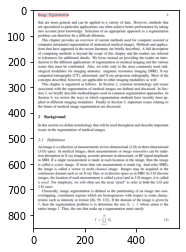

In [84]:
plt.imshow(im1)

In [186]:
w = "Background"
with im.open("./imgs/im13.png").convert("RGBA") as base:
                txtt = im.new("RGBA", base.size, (255,255,255,255))   #base.size = ((len(w)*15)+(len(w)*5),50)
                fnt = ImageFont.truetype("./Fonts/times new roman bold.ttf",25)
                d = ImageDraw.Draw(txtt)
                d.text((0,10),w,font=fnt,fill=(0,0,0,255), align="center")
                #out = im.alpha_composite(base,txtt)
                #out.show()
                txtt.save(w+".png","PNG")
                txtt.show()
                #plt.imshow(txtt)


In [187]:
imm = cv.imread("Background.png")
imm = trimWhiteSpace(imm)
plt.imsave("tt.png",imm)



In [188]:
im1 = cv.imread("./imgs/im13.png")
#im1 = cv.cvtColor(im1,cv.COLOR_RGB2GRAY)
im2 = cv.imread("./tt.png")
#im2 = cv.cvtColor(im2,cv.COLOR_RGB2GRAY)
def findText3(im1,im2):
    
    im1 = cv.cvtColor(im1,cv.COLOR_RGB2GRAY)
    im2 = cv.cvtColor(im2,cv.COLOR_RGB2GRAY)
    
    res = cv.matchTemplate(im1,im2,cv.TM_SQDIFF)
    minV,maxV,minPos,maxPos = cv.minMaxLoc(res)
    w,h = (im2.shape[0],im2.shape[1])
    top_left = minPos    
    bottom_right = (top_left[0]+h,top_left[1]+w)
    #cv.rectangle(im1,top_left,bottom_right,255,0)
    
    psnr=cv.PSNR(im1[top_left[1]:top_left[1]+w,top_left[0]:top_left[0]+h],im2)
    sqdif=erreurQuad(im1[top_left[1]:top_left[1]+w,top_left[0]:top_left[0]+h],im2)
    
    zeros = im2 - im1[top_left[1]:top_left[1]+w,top_left[0]:top_left[0]+h]
    linearzeros = zeros.reshape(1,w*h)
    linearzeros = linearzeros[linearzeros==0]
    
    if(psnr>10 and sqdif<144 and len(linearzeros)>((40*(w*h))/100)):
        plt.imshow(im1[top_left[1]:top_left[1]+w,top_left[0]:top_left[0]+h],cmap="gray")
        return True
    
    
    
    #plt.imshow(im1)
    #plt.imsave("tttt.png",im1)
findText3(im1,im2)    